In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/vasutiwari2019/KBSProject_VasuTiwari/main/MELBOURNE_HOUSE_PRICES.csv')

In [6]:
# After importing the dataset,showing off the top 5 values in the data set to get an idea of how the data set looks like
df.head(5)

Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0  1/04/2017      3067  Northern Metropolitan           4019       3.0   
1  1/04/2017      3067  Northern Metropolitan           4019       3.0   
2  1/04/2017      3067  Northern Metropolitan           4019       3.0   
3  1/04/2017      3040   Western Metropolitan           1543       7.5   
4  1/04/2017      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Council  
2          Yarra City Council  
3  Moonee Valley City Council  
4  Moonee Valley City Council

In [7]:
#Displaying the data type of each column in the DataFrame to understand the type of data our dataset has.
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [8]:
#understanding the total no. of entries or rows and the no. of features or columns in the format of (x,y) respectively
print(df.shape)

(63023, 13)


In [9]:
# checking if there are any null values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [11]:
# We discoverd that price column has 14590 records with null values.
# Printing all the rows of the DataFrame df where the 'Price' column has a null or missing value

print(df[df['Price'].isnull()])

                 Suburb                Address  Rooms Type  Price Method  \
8             Albanvale          1 Jackson Cct      6    h    NaN     PI   
15       Altona Meadows           57 Tatman Dr      4    h    NaN     SN   
24            Ashburton              1 Pitt St      4    h    NaN      S   
29              Attwood     46 Threadneedle St      4    h    NaN     SN   
38         Balwyn North            12 Agnes Av      3    h    NaN     SP   
...                 ...                    ...    ...  ...    ...    ...   
63001      Wyndham Vale          15 Yaltara Dr      3    h    NaN      S   
63008        Yarraville  4/247 Williamstown Rd      3    t    NaN      S   
63010           Burwood           29 Summit Rd      4    h    NaN     PN   
63021        Thomastown         3/1 Travers St      3    u    NaN     PI   
63022  Williams Landing            1 Diadem Wy      4    h    NaN     SP   

             SellerG        Date  Postcode             Regionname  \
8      hockingstua

In [12]:
# Creating a new dataframe by removing any rows with missing or null values from the original DataFrame.
new_df = df.dropna()

EDA

In [13]:
# Our dataset is a housing dataset. So we are checking the region names available in our dataset 
# in order to explore the price disrtibution with regionnames 

print(new_df['Regionname'].unique())

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'South-Eastern Metropolitan' 'Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']


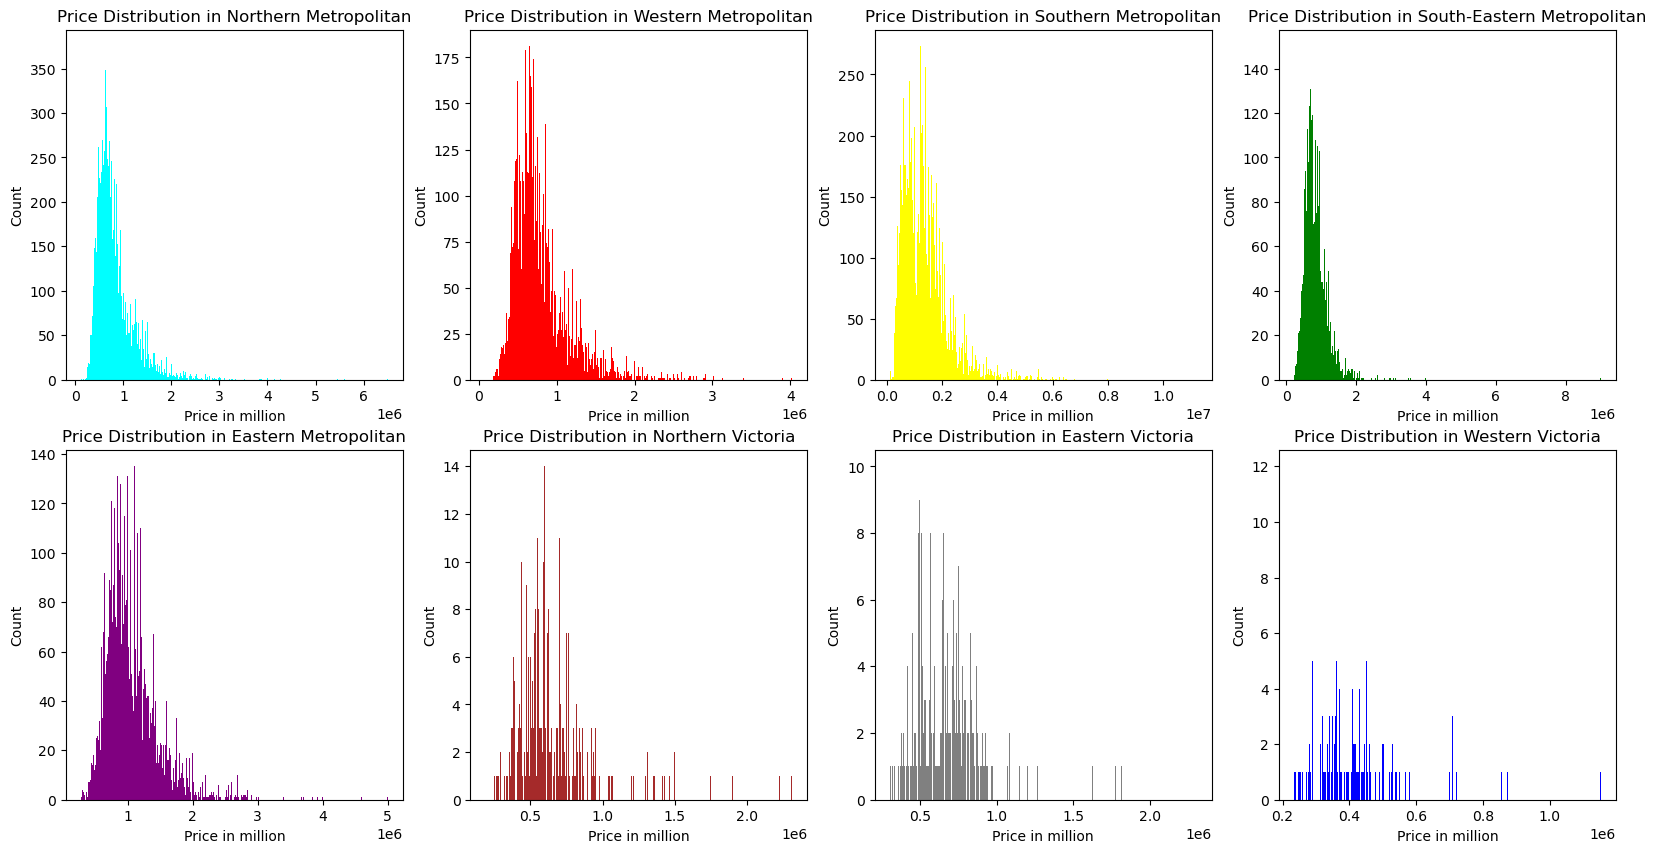

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

colors = ['cyan', 'red', 'yellow', 'green', 'purple', 'brown', 'gray', 'blue']

for i, region in enumerate(new_df['Regionname'].unique()):
    df_region = new_df[new_df['Regionname'] == region]
    axs[i].hist(df_region['Price'], bins=500, color=colors[i])
    axs[i].set_xlabel('Price in million')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Price Distribution in {region}')
    
plt.show()


# The above histogram shows the house price distribution for each of the regions in Melbourne. There are more number of houses with less than 2 million in price in Western and Eastern Metropolitan

In [15]:
# Mean price of houses in each region

avg_prices = new_df.groupby('Regionname')['Price'].mean().values
regions = ['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan',
 'South-Eastern Metropolitan', 'Eastern Metropolitan', 'Northern Victoria',
 'Eastern Victoria', 'Western Victoria']
print(avg_prices)
print(regions)

[1071837.47936717  689368.81016043  823719.84446242  643082.17142857
  846235.16583541 1373221.77129652  800516.29214876  412026.0989011 ]
['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'South-Eastern Metropolitan', 'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']


In [16]:
# Average Sales by Region

fig, ax = plt.subplots()
labels = [f'{region}\n${price:.2f}' for region, price in zip(regions, avg_prices)]
ax.pie(avg_prices, labels=labels, autopct='%1.1f%%')
ax.set_title('Average Sales by Region')
plt.show()

# As we can see Average price of property Sales is higher in Northern victoria Region

In [17]:
# Bar chart for Number of bedrooms 
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Rooms', data=new_df, ax=ax)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 50), ha='center')
ax.set_title('Number of Properties by Number of Rooms')
plt.show()


# From the bar chart it is evident that most of the property in Melbourne has 3 bedroom unit.

In [18]:
# Boxplot for distribution if Property Sales
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=new_df['Price'], ax=ax)
ax.set_title('Distribution of Property Prices')
plt.show()

#  Checking the outliers for houses with price more than 5 million dollars.

In [19]:
price_outliers = new_df[new_df['Price'] > 5000000]
price_outliers.head()

Suburb         Address  Rooms Type      Price Method   SellerG  \
684      Armadale  52 Adelaide St      5    h  5200000.0     SP  Marshall   
1593       Toorak      12 Hill St      5    h  6700000.0     VB  Marshall   
2018  Middle Park     80 Nimmo St      4    h  5440000.0      S    Cayzer   
2766     Hawthorn    32 Lisson Gr      5    h  5700000.0     VB       Kay   
3545     Hawthorn  17 Fairview St      5    h  5510000.0      S        RT   

           Date  Postcode             Regionname  Propertycount  Distance  \
684   1/07/2017      3143  Southern Metropolitan           4836       6.3   
1593  1/09/2018      3142  Southern Metropolitan           7217       4.1   
2018  2/06/2018      3206  Southern Metropolitan           2019       3.0   
2766  3/03/2018      3122  Southern Metropolitan          11308       5.3   
3545  3/06/2017      3122  Southern Metropolitan          11308       5.3   

                    CouncilArea  
684    Stonnington City Council  
1593   Stonnington City Council  
2018  Port Phillip City Council  
2766    Boroondara City Council  
3545    Boroondara City Council

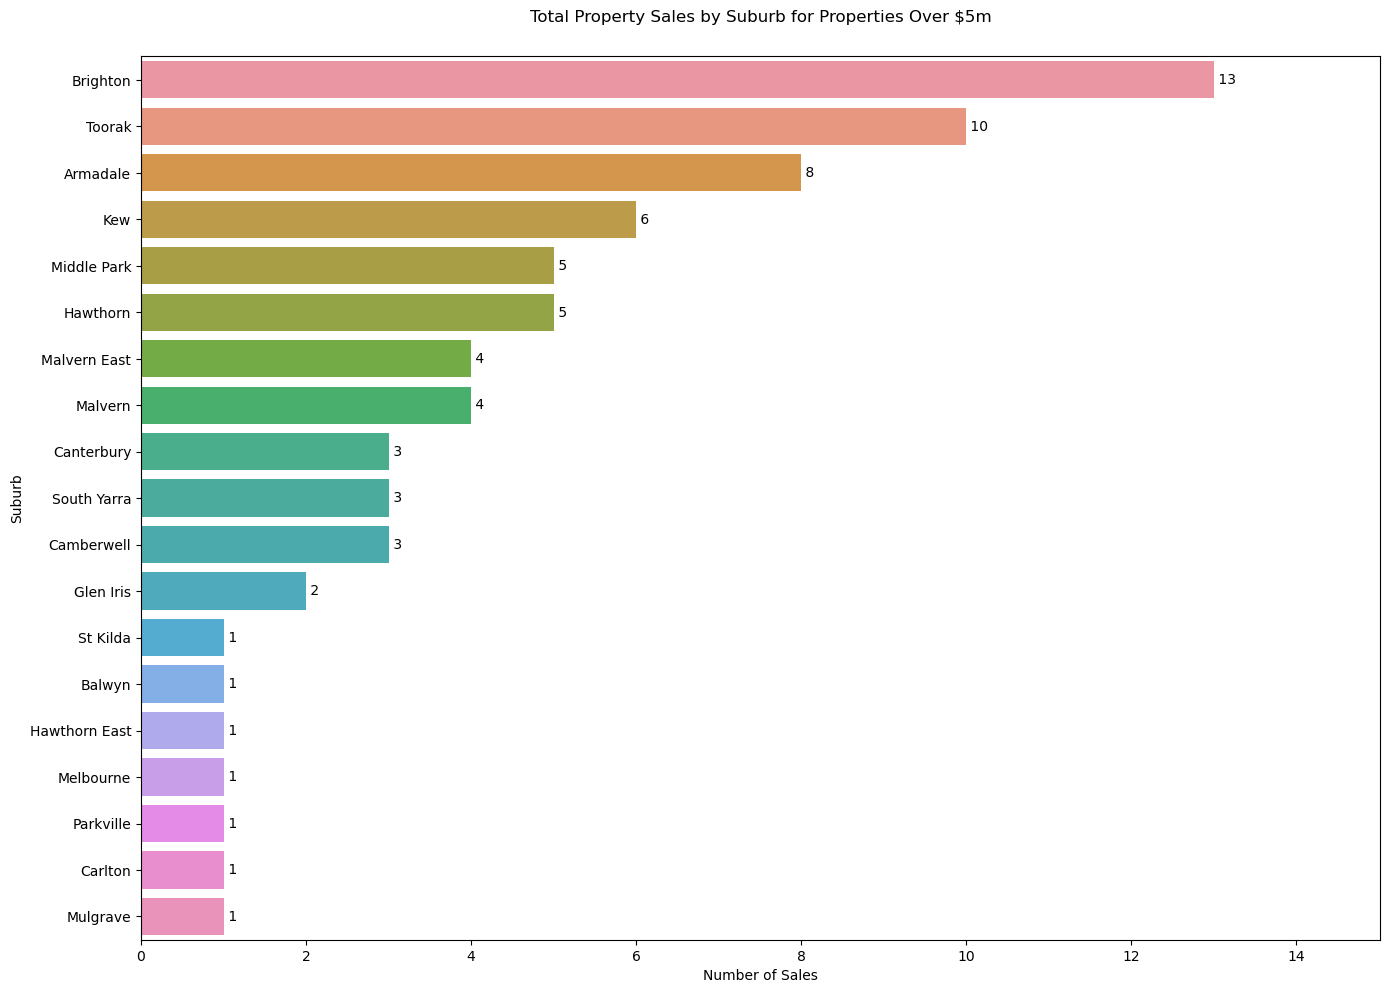

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(data=price_outliers, y='Suburb', ax=ax, order=price_outliers['Suburb'].value_counts().index)
ax.set_title("Total Property Sales by Suburb for Properties Over $5m", y=1.03)
ax.set_xlabel("Number of Sales")
ax.set_ylabel("Suburb")

# add count value on the bars
for i, v in enumerate(price_outliers['Suburb'].value_counts().sort_values(ascending=False)):
    ax.text(v, i, f" {v}", color='black', ha='left', va='center')

# adjust x-axis limits
ax.set_xlim([0, ax.get_xlim()[1]*1.1])
plt.tight_layout()
plt.show()

The above count plot shows the total property sales in each suburbs and as we can see 'Brighton' has many properties with more than
5 million dollar house.

In [21]:
region = new_df['Regionname'].value_counts()
fig = px.bar(region, x=region.index, y='Regionname', labels={'x':'Region', 'y':'Number of Houses'})
fig.update_layout(title='Number of Houses per Region', xaxis_tickangle=-45, width=800, height=600)
fig.show()

# The above bar graph indicates the number of houses in each region and Northern Metropolitan has highest number of houses in Melbourne.

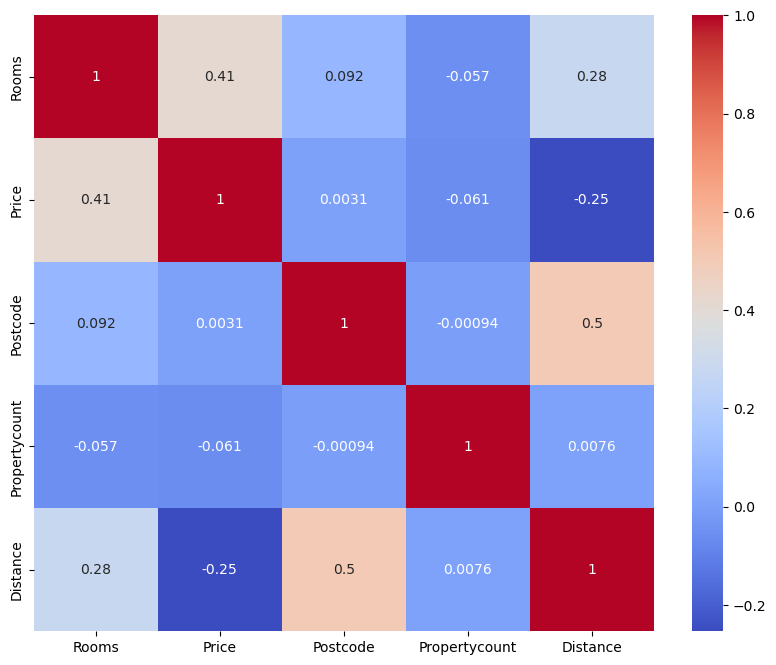

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), cmap="coolwarm", annot=True)
plt.show()

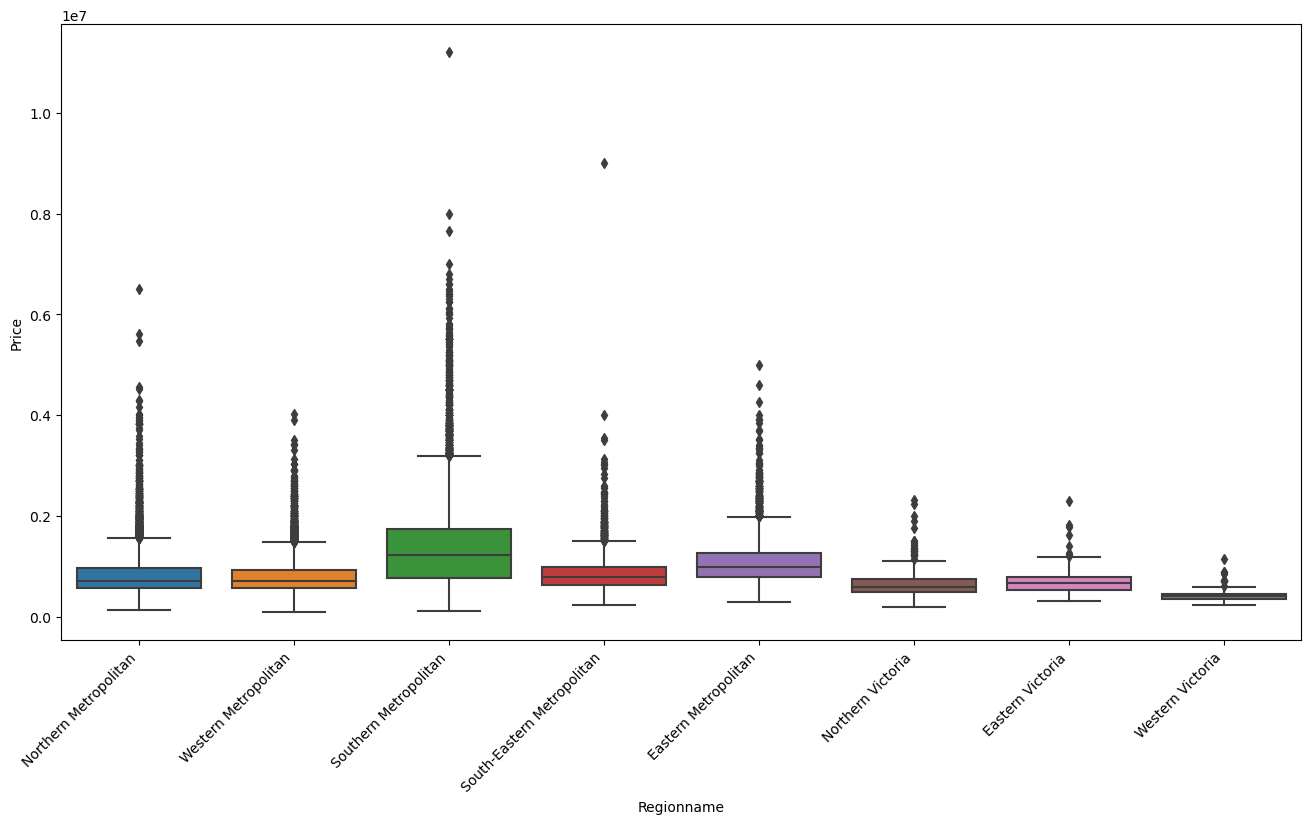

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="Regionname", y="Price", data=new_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

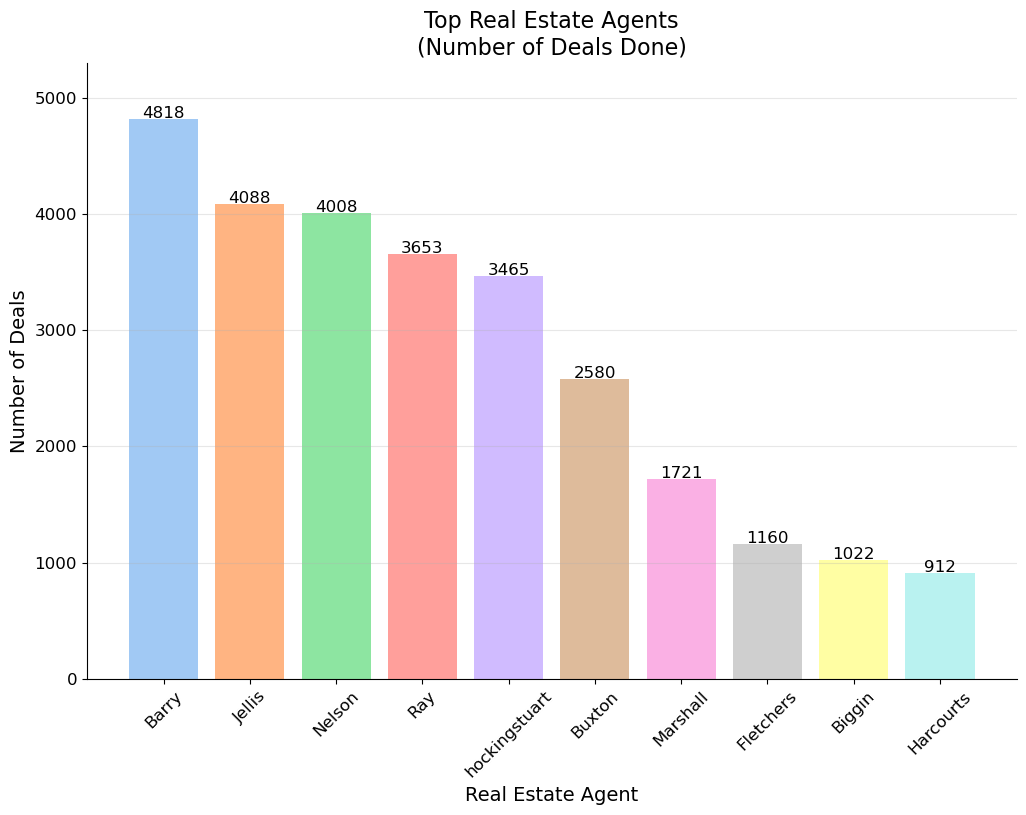

In [23]:
# Bar chart indicating the TOP Real Estate Agents and the number of deals done by them.
colors = sns.color_palette('pastel').as_hex()

REA = new_df['SellerG'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(REA.index, REA.values, color=colors)
ax.set_title('Top Real Estate Agents\n(Number of Deals Done)', fontsize=16)
ax.set_xlabel('Real Estate Agent', fontsize=14)
ax.set_ylabel('Number of Deals', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', alpha=0.3)
ax.margins(y=0.1)
for i, v in enumerate(REA.values):
    ax.text(i, v+10, str(v), ha='center', fontsize=12)
sns.despine()
plt.show()

In [24]:
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%d/%m/%Y')

C:\Users\vishn\AppData\Local\Temp\ipykernel_34216\105030885.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
new_df['Season'] = new_df['Date'].dt.month.map({
    3: 'Autumn',
    4: 'Autumn',
    5: 'Autumn',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring',
    12: 'Summer',
    1: 'Summer',
    2: 'Summer'
})

C:\Users\vishn\AppData\Local\Temp\ipykernel_34216\1098738668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# After performing EDA, we found that Northern Victoria has highest number of properties as well the average sales in that region is highest. We also found that in our dataset 3 bedroom houses are high in number, we are exploring Northern Victoria with 3 bedroom houses further

In [26]:
northern_victoria = new_df[new_df['Regionname'] == 'Northern Victoria']
northern_victoria = new_df[new_df['Rooms'] == 3]
northern_victoria

Suburb            Address  Rooms Type      Price Method  \
0         Abbotsford      49 Lithgow St      3    h  1490000.0      S   
1         Abbotsford      59A Turner St      3    h  1220000.0      S   
2         Abbotsford      119B Yarra St      3    h  1420000.0      S   
3         Aberfeldie         68 Vida St      3    h  1515000.0      S   
7       Airport West  1/26 Highridge Cr      3    h   715000.0     SP   
...              ...                ...    ...  ...        ...    ...   
63011        Doveton      12 Scarlet Dr      3    h   595000.0     PI   
63017        Preston      229 Murray Rd      3    h   808000.0      S   
63018  Roxburgh Park          3 Carr Pl      3    h   566000.0      S   
63019  Roxburgh Park        9 Parker Ct      3    h   500000.0      S   
63020  Roxburgh Park     5 Parkinson Wy      3    h   545000.0      S   

        SellerG       Date  Postcode                  Regionname  \
0        Jellis 2017-04-01      3067       Northern Metropolitan   
1      Marshall 2017-04-01      3067       Northern Metropolitan   
2        Nelson 2017-04-01      3067       Northern Metropolitan   
3         Barry 2017-04-01      3040        Western Metropolitan   
7        Nelson 2017-04-01      3042        Western Metropolitan   
...         ...        ...       ...                         ...   
63011     REMAX 2018-03-31      3177  South-Eastern Metropolitan   
63017        RW 2018-03-31      3072       Northern Metropolitan   
63018     Raine 2018-03-31      3064       Northern Metropolitan   
63019     Raine 2018-03-31      3064       Northern Metropolitan   
63020     Raine 2018-03-31      3064       Northern Metropolitan   

       Propertycount  Distance                 CouncilArea  Season  
0               4019       3.0          Yarra City Council  Autumn  
1               4019       3.0          Yarra City Council  Autumn  
2               4019       3.0          Yarra City Council  Autumn  
3               1543       7.5  Moonee Valley City Council  Autumn  
7               3464      10.4  Moonee Valley City Council  Autumn  
...              ...       ...                         ...     ...  
63011           3533      28.8          Casey City Council  Autumn  
63017          14577       8.4        Darebin City Council  Autumn  
63018           5833      20.6           Hume City Council  Autumn  
63019           5833      20.6           Hume City Council  Autumn  
63020           5833      20.6           Hume City Council  Autumn  

[21812 rows x 14 columns]

In [27]:
# Grouping the houses in Northern Victoria by Seasons
avg_prices_north_victoria = northern_victoria.groupby('Season')['Price'].mean().reset_index()

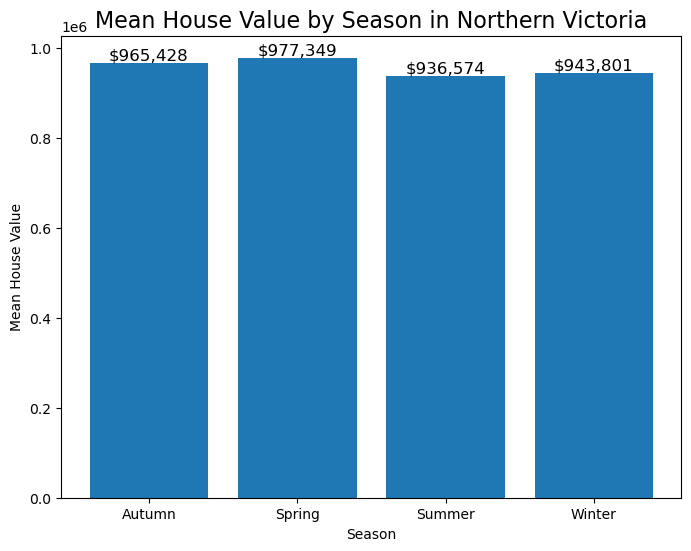

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

# create the bar chart
bars = ax.bar(avg_prices_north_victoria['Season'], avg_prices_north_victoria['Price'])

# add labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Mean House Value')
ax.set_title('Mean House Value by Season in Northern Victoria', fontsize=16)

# add text labels to each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"${avg_prices_north_victoria['Price'][i]:,.0f}",
            ha='center', va='bottom', fontsize=12)

plt.show()

# 
Average Price of property sales  is higher for Northern Victoria Region
During Spring, the property sales has the highest average price for Northern Victoria, since it is traditional to buy and sell houses during Spring in Melbourne.

The typical price range is lower throughout the summer and winter (holidays) seasons because it is extremely unlikely that people will buy and sell real estate during these times.

Most property in Melbourne has 3 bedroom unit.

Top 3 dealers are same during the year 2016 - 2018 and in 2018.

We will Predict Price by using Supervised models with  input features such as RegionName, Suburbs, Type, Rooms and Seller.